## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [2]:
#set up block
import numpy as np
import pandas as pd
import seaborn as sns


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.

In [ ]:
df_car = pd.read_csv('./data/car_data.csv')
print(df_car.head(), "\n")
print(df_car.shape, '\n')
print(df_car.columns)

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 

(1000, 5) 

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.

In [ ]:
#summarize
print(df_car.describe(), '\n')

#find any missing values
print('User ID', '\n')
print(df_car['User ID'].isna().sum(), '\n')

print('Gender', '\n')
print(df_car['Gender'].isna().sum(), '\n')

print('Age', '\n')
print(df_car['Age'].isna().sum(), '\n')

print('AnnualSalary', '\n')
print(df_car['AnnualSalary'].isna().sum(), '\n')

print('Purchased', '\n')
print(df_car['Purchased'].isna().sum(), '\n')

#converting gender to dummy var
print(df_car['Gender'].value_counts(), '\n')

df_car["Gender_Dummy"] = 0
df_car.loc[df_car['Gender']== 'Female', 'Gender_Dummy'] = 1
df_car['Gender_Dummy'].value_counts()

#creating matrix X
vars = ['Age', 'AnnualSalary']
X = df_car.loc[:,vars]
y = df_car['Purchased']


           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000 

User ID 

0 

Gender 

0 

Age 

0 

AnnualSalary 

0 

Purchased 

0 

Female    516
Male      484
Name: Gender, dtype: int64 



3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.

In [ ]:
def maxmin(x):
    x = (x-min(x))/(max(x) - min(x))
    return x

X = X.apply(maxmin)

X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


4. Split the sample into a ~80% training dataset and a ~20% testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=101)

5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.

[9]


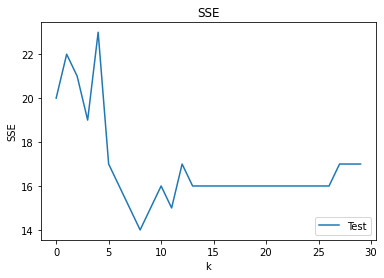

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#optimal K
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar), SSE, label="Test")
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc = 'lower right')

plt.title('SSE')
plt.show()

#the optimal k is 9

6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

In [ ]:
model = KNeighborsClassifier(n_neighbors = 9)
fitted_model = model.fit(X_train, y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

#The predictions are mostly correct, with a total of only 14 inncorrect cases.
#Out of 128 no-sales 120 were correctly predicted. Out of 72 sales 66 were
#correctly predicted. Overall it provides predictions with a 93% accuracy.

col_0,0,1
Purchased,,
0,120,8
1,6,66


7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df_car.loc[:,vars]
y = df_car['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=101)

model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

print("Female")
print(pd.crosstab(y_F, y_hat_F), '\n')

print("Male")
print(pd.crosstab(y_M, y_hat_M))

#For women the prediction is about 76% accurate and for men it is about 83%
#accurate. It is more accurate for men by a significant amount, this would cause
#issues if data indicated something critical.

Female
col_0       0   1
Purchased        
0          51  15
1          10  28 

Male
col_0       0   1
Purchased        
0          58   4
1          12  22


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [21]:
df_us = pd.read_csv('./data/USA_cars_datasets.csv')
df_us = df_us[['price','year','mileage']]
df_us.head()
print(df_us.shape, '\n')
print(df_us['price'].isna().sum())
print(df_us['year'].isna().sum())
print(df_us['mileage'].isna().sum())

#there are no NAs to handle

(2499, 3) 

0
0
0


2. Maxmin normalize `year` and `mileage`.

In [22]:
vars = ['year','mileage']
X = df_us.loc[:,vars]
y = df_us['price']

def maxmin(x):
    x = (x-min(x))/(max(x) - min(x))
    return x

X = X.apply(maxmin)

X.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=102)

4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

SSE test data for  3 :  65402835436.375
SSE train data for  3 :  158879146681.5625 

SSE test data for  10 :  59221135381.79338
SSE train data for  10 :  183462455963.6281 

SSE test data for  25 :  54226080757.54438
SSE train data for  25 :  195626010783.9867 

SSE test data for  50 :  53874342501.52364
SSE train data for  50 :  200370225058.62897 

SSE test data for  100 :  54970931500.02294
SSE train data for  100 :  204164415438.2575 

SSE test data for  300 :  56149780563.13135
SSE train data for  300 :  212026428410.28122 



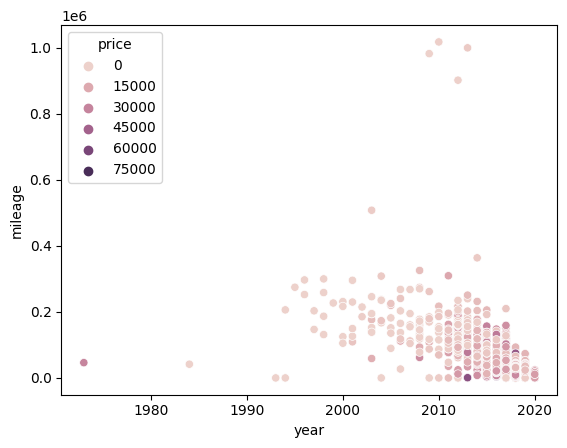

In [24]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

k_grid = np.arange(1, 301)
SSE_train = np.zeros(301)
SSE_test = np.zeros(301)

def statics(k,X,y): # This function replicates our previous work, with k as an input
    model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100 # Coarseness of x variable
    N_y = 100 # Coarseness of y variable
    total = N_x*N_y # Total number of points to plot
    grid_x = np.linspace(0,1,N_x) # Create a grid of x values
    grid_y = np.linspace(0,1,N_y) # Create a grid of y values
    xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
    X = xs.reshape(total) # Turns pairs into vectors
    Y = ys.reshape(total) # Turns pairs into vectors
    x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
    y_hat = fitted_model.predict(x_hat) # Fit the model to the points
    x_hat['price'] = y_hat # Add new variable to the dataframe
    this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',hue='price') # Create seaborn plot
    #sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))
    print(this_plot)

for k in [3,10,25,50,100,300]:
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE
    print("SSE test data for ", k, ": ", SSE_test[k])
    print("SSE train data for ", k, ": ", SSE_train[k], "\n")


this_plot = sns.scatterplot(data=df_us,x='year',y='mileage',hue='price')

Axes(0.125,0.11;0.775x0.77)


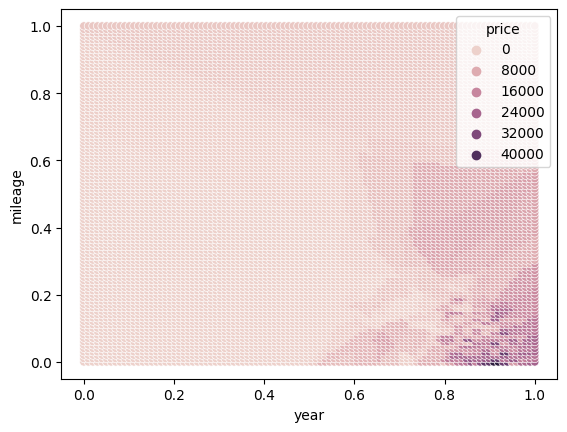

In [25]:
statics(3, X_train, y_train)

Axes(0.125,0.11;0.775x0.77)


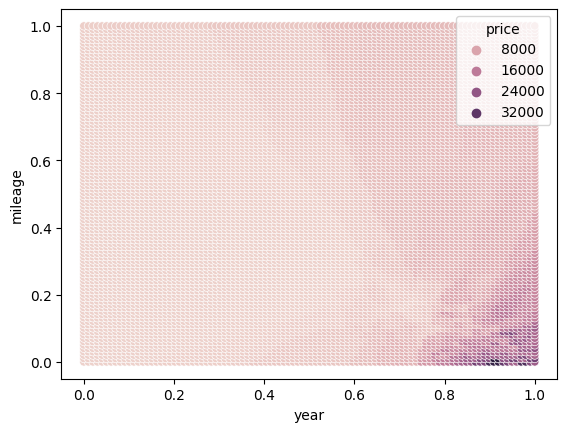

In [12]:
statics(10, X_train, y_train)

Axes(0.125,0.11;0.775x0.77)


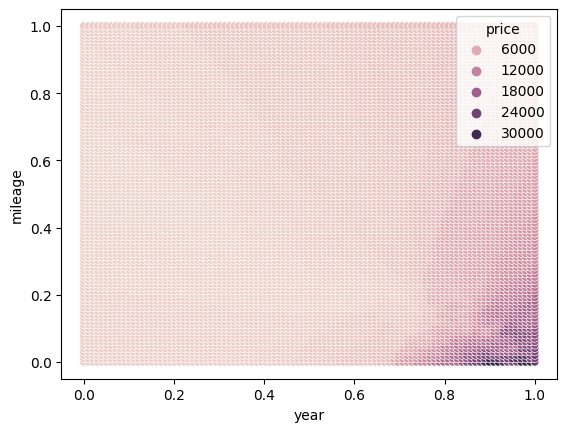

In [16]:
statics(25, X_train, y_train)

Axes(0.125,0.11;0.775x0.77)


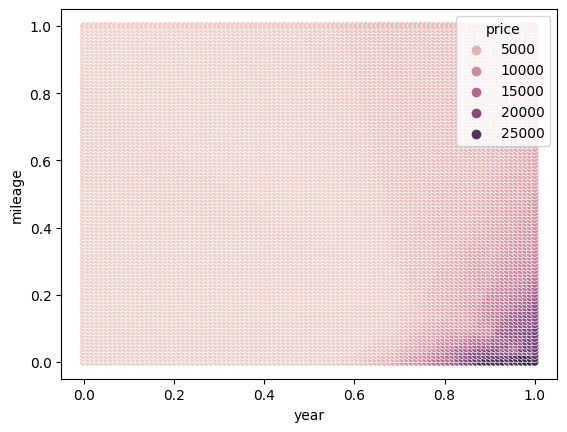

In [17]:
statics(50, X_train, y_train)

Axes(0.125,0.11;0.775x0.77)


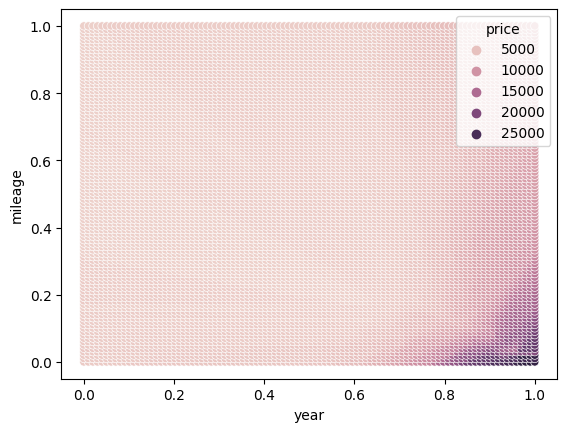

In [18]:
statics(100, X_train, y_train)

Axes(0.125,0.11;0.775x0.77)


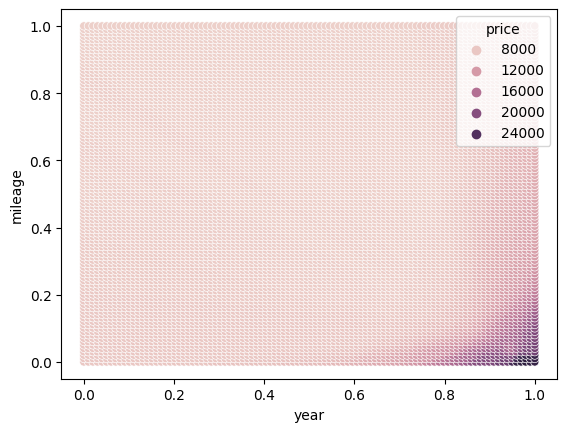

In [19]:
statics(300,X_train, y_train)

5. Determine the optimal $k$ for these data.

In [ ]:
SSE_test_min = np.min(SSE_test)
print(SSE_test_min)
min_index = np.where(SSE_test==SSE_test_min)
k_star = k_grid[min_index]
#print(k_star)

#ideal k is 50

0.0


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Before the predicted plots I made a scatter plot of the data without a model to better visualize/verify the data. When looking at the predicted plots is it clear that k = 3 is underfitting, as it creates a visualization with clear chunks that do not represent the data. k= 10 and k = 25 share these issues to a lesser extent. k = 50 is the best fiting k. k = 300 is overfitting as there is little that can be distinguished, and the graph appears mostly as a gradient.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.


Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.

In [26]:
df_air = pd.read_csv('./data/airbnb_hw.csv')

df_air = df_air.dropna()
df_air['Price'] = df_air['Price'].str.replace(",","")
df_air["Price"] = df_air["Price"].astype(float)

print(df_air['Price'].dtypes, '\n')
print(df_air['Price'].value_counts(), '\n')
print(df_air['Price'].isna().sum())

print(df_air['Beds'].dtypes, '\n')
print(df_air['Beds'].value_counts(), '\n')
print(df_air['Beds'].isna().sum())

print(df_air['Number Of Reviews'].dtypes, '\n')
print(df_air['Number Of Reviews'].value_counts(), '\n')
print(df_air['Number Of Reviews'].isna().sum())

print(df_air['Review Scores Rating'].dtypes, '\n')
print(df_air['Review Scores Rating'].value_counts(), '\n')
print(df_air['Review Scores Rating'].isna().sum())

print(df_air.shape)

float64 

150.0    1015
100.0     745
200.0     684
125.0     660
75.0      582
         ... 
656.0       1
327.0       1
492.0       1
383.0       1
454.0       1
Name: Price, Length: 462, dtype: int64 

0
float64 

1.0     14452
2.0      4918
3.0      1580
4.0       596
5.0       222
6.0       146
7.0        38
8.0        16
10.0       15
16.0       10
9.0         9
12.0        4
11.0        3
0.0         1
Name: Beds, dtype: int64 

0
int64 

1      3109
2      2392
3      1744
4      1373
5      1066
       ... 
216       1
191       1
213       1
178       1
130       1
Name: Number Of Reviews, Length: 204, dtype: int64 

0
float64 

100.0    5555
90.0     1718
93.0     1607
80.0     1413
95.0     1286
96.0     1182
97.0     1028
94.0      937
92.0      869
98.0      837
91.0      806
87.0      709
88.0      613
89.0      554
85.0      362
86.0      343
99.0      313
84.0      288
83.0      264
60.0      244
82.0      136
70.0      131
73.0       89
78.0       84
77.0       80
76.

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [27]:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df_air.loc[ : , ['Beds', 'Number Of Reviews', 'Review Scores Rating']]
X = X.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(X)

X['g_hat'] = model.predict(X)
df_air['g_hat'] = X['g_hat']


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

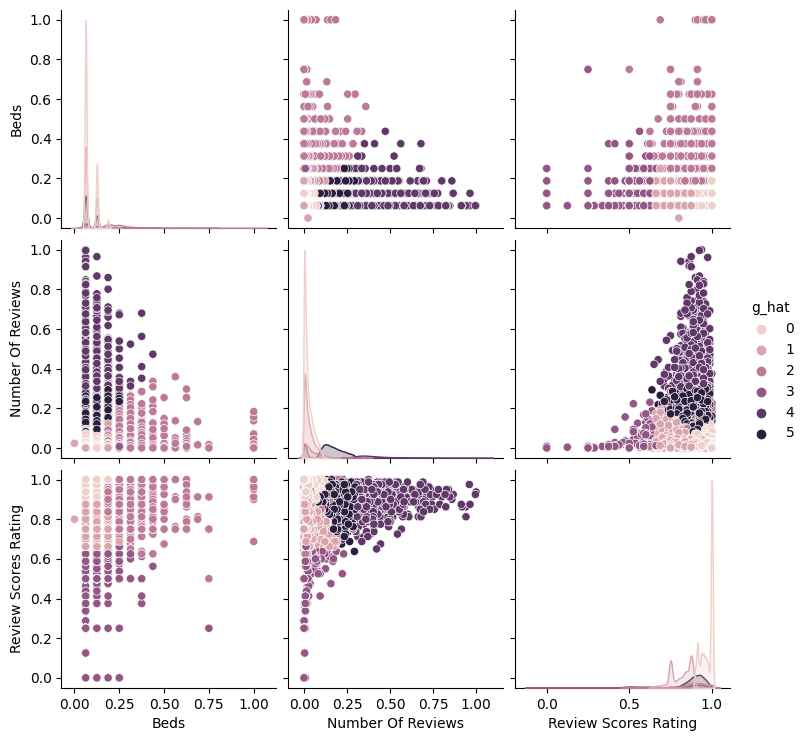

In [30]:
sns.pairplot(X, hue = 'g_hat')


5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [31]:
group = df_air.groupby('g_hat')

group['Price'].describe()

#The clusters with the highest rental price are groups 1 and 4.

,count,mean,std,min,25%,50%,75%,max
g_hat,,,,,,,,
0,10469.0,152.284745,147.415039,10.0,85.0,130.0,190.00,10000.0
1,5498.0,131.700073,103.037272,20.0,75.0,110.5,169.00,5000.0
2,1611.0,293.414029,263.135009,27.0,150.0,229.0,350.00,4500.0
3,656.0,133.254573,212.204785,25.0,65.0,99.0,151.25,5000.0
4,768.0,133.393229,83.873914,27.0,80.0,110.0,169.00,875.0
5,3008.0,141.429521,84.009626,22.0,87.0,125.0,175.00,1000.0


6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')


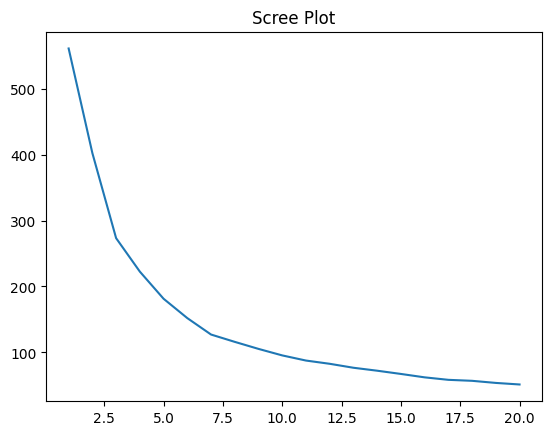

In [32]:
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df_air.loc[ : , ['Beds', 'Number Of Reviews', 'Review Scores Rating']]
X = X.apply(maxmin)

k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
print(plot)

#best number is 7

,count,mean,std,min,25%,50%,75%,max
g_hat,,,,,,,,
0,1624.0,293.772167,261.558658,27.0,150.0,229.0,350.0,4500.0
1,408.0,129.781863,255.632797,25.0,60.0,90.0,150.0,5000.0
2,2778.0,132.527718,126.480958,20.0,70.0,109.0,165.0,5000.0
3,655.0,133.004580,78.534678,29.0,80.0,110.0,169.0,649.0
4,2562.0,139.258392,83.140371,22.0,85.0,120.0,175.0,895.0
5,7933.0,154.577461,119.199141,10.0,85.0,130.0,195.0,3500.0
6,6050.0,138.506942,150.247283,24.0,80.0,120.0,175.0,10000.0


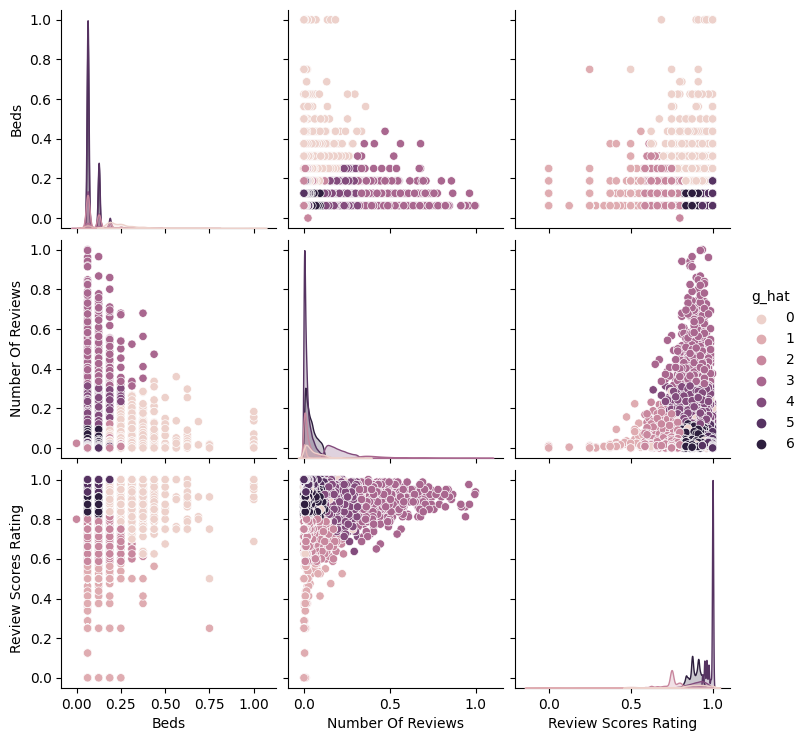

In [33]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 7, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(X)

X['g_hat'] = model.predict(X)
df_air['g_hat'] = X['g_hat']

sns.pairplot(X, hue = 'g_hat')

group = df_air.groupby('g_hat')

group['Price'].describe()

#The groups with the highest price are groups 6 and 4.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?